In [15]:
import torch
import datasets, networks, sampling, completion, evaluation
import matplotlib.pyplot as plt
from torch import nn

In [16]:
#HYPERPARAMETERS
num_epochs = 10

# TODO Select a optimizer. [ 'adam', 'adamw', 'rmsprop' ]
optimizer_option = 'adamw'

# TODO Select a batch size.
batch_size = 64

# TODO Select a learning rate.
lr = 0.01


num_residual = 15
num_kernels = 128

In [17]:
ds = datasets.Dataset('mnist', batch_size=batch_size)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

Using device: cuda:0
Epoch:   1/ 10, Batch     1, Loss: 5.6132
Epoch:   1/ 10, Batch   101, Loss: 1.6913
Epoch:   1/ 10, Batch   201, Loss: 1.0942
Epoch:   1/ 10, Batch   301, Loss: 1.0235
Epoch:   1/ 10, Batch   401, Loss: 0.9765
Epoch:   1/ 10, Batch   501, Loss: 0.9541
Epoch:   1/ 10, Batch   601, Loss: 0.9289
Epoch:   1/ 10, Batch   701, Loss: 0.9088
Epoch:   1/ 10, Batch   801, Loss: 0.8980
Epoch:   1/ 10, Batch   901, Loss: 0.8803
-----------------------------------------
Epoch:   1 took 167.07s
Epoch:   1, Test Loss: 0.8643
-----------------------------------------


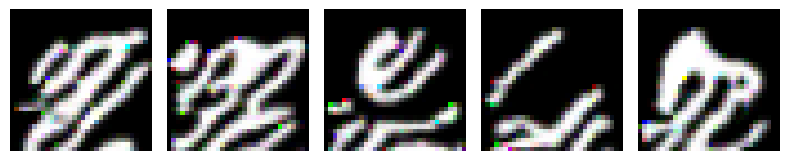

Epoch:   2/ 10, Batch     1, Loss: 0.8474
Epoch:   2/ 10, Batch   101, Loss: 0.8603
Epoch:   2/ 10, Batch   201, Loss: 0.8431
Epoch:   2/ 10, Batch   301, Loss: 0.8389
Epoch:   2/ 10, Batch   401, Loss: 0.8290
Epoch:   2/ 10, Batch   501, Loss: 0.8156
Epoch:   2/ 10, Batch   601, Loss: 0.8242
Epoch:   2/ 10, Batch   701, Loss: 0.8069
Epoch:   2/ 10, Batch   801, Loss: 0.8087
Epoch:   2/ 10, Batch   901, Loss: 0.7932
-----------------------------------------
Epoch:   2 took 170.16s
Epoch:   2, Test Loss: 0.7955
-----------------------------------------


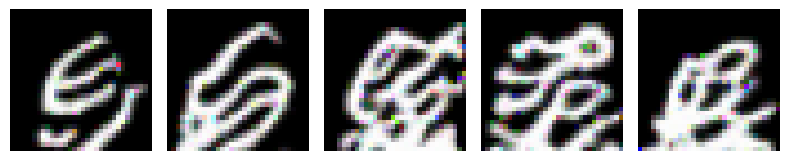

Epoch:   3/ 10, Batch     1, Loss: 0.8219
Epoch:   3/ 10, Batch   101, Loss: 0.7795
Epoch:   3/ 10, Batch   201, Loss: 0.7805
Epoch:   3/ 10, Batch   301, Loss: 0.7762
Epoch:   3/ 10, Batch   401, Loss: 0.7731
Epoch:   3/ 10, Batch   501, Loss: 0.7639
Epoch:   3/ 10, Batch   601, Loss: 0.7706
Epoch:   3/ 10, Batch   701, Loss: 0.7615
Epoch:   3/ 10, Batch   801, Loss: 0.7629
Epoch:   3/ 10, Batch   901, Loss: 0.7577
-----------------------------------------
Epoch:   3 took 173.83s
Epoch:   3, Test Loss: 0.7471
-----------------------------------------


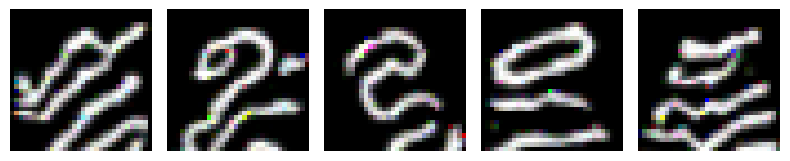

Epoch:   4/ 10, Batch     1, Loss: 0.7340
Epoch:   4/ 10, Batch   101, Loss: 0.7423
Epoch:   4/ 10, Batch   201, Loss: 0.7507
Epoch:   4/ 10, Batch   301, Loss: 0.7465
Epoch:   4/ 10, Batch   401, Loss: 0.7419
Epoch:   4/ 10, Batch   501, Loss: 0.7390
Epoch:   4/ 10, Batch   601, Loss: 0.7326
Epoch:   4/ 10, Batch   701, Loss: 0.7346
Epoch:   4/ 10, Batch   801, Loss: 0.7430
Epoch:   4/ 10, Batch   901, Loss: 0.7342
-----------------------------------------
Epoch:   4 took 169.45s
Epoch:   4, Test Loss: 0.7351
-----------------------------------------


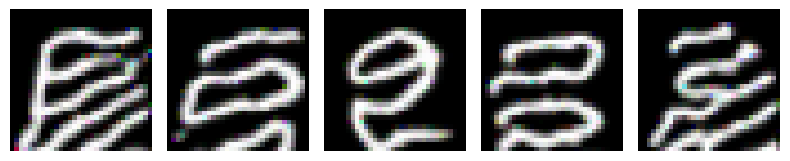

Epoch:   5/ 10, Batch     1, Loss: 0.7626
Epoch:   5/ 10, Batch   101, Loss: 0.7396
Epoch:   5/ 10, Batch   201, Loss: 0.7247
Epoch:   5/ 10, Batch   301, Loss: 0.7218
Epoch:   5/ 10, Batch   401, Loss: 0.7233
Epoch:   5/ 10, Batch   501, Loss: 0.7161
Epoch:   5/ 10, Batch   601, Loss: 0.7165
Epoch:   5/ 10, Batch   701, Loss: 0.7160
Epoch:   5/ 10, Batch   801, Loss: 0.7152
Epoch:   5/ 10, Batch   901, Loss: 0.7172
-----------------------------------------
Epoch:   5 took 168.79s
Epoch:   5, Test Loss: 0.7478
-----------------------------------------


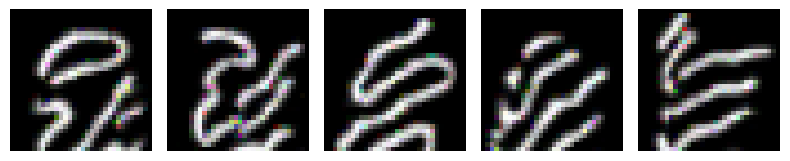

Epoch:   6/ 10, Batch     1, Loss: 0.7536
Epoch:   6/ 10, Batch   101, Loss: 0.7086
Epoch:   6/ 10, Batch   201, Loss: 0.7110
Epoch:   6/ 10, Batch   301, Loss: 0.7045
Epoch:   6/ 10, Batch   401, Loss: 0.7051
Epoch:   6/ 10, Batch   501, Loss: 0.7042
Epoch:   6/ 10, Batch   601, Loss: 0.7019
Epoch:   6/ 10, Batch   701, Loss: 0.7057
Epoch:   6/ 10, Batch   801, Loss: 0.7012
Epoch:   6/ 10, Batch   901, Loss: 0.6985
-----------------------------------------
Epoch:   6 took 171.73s
Epoch:   6, Test Loss: 0.6962
-----------------------------------------


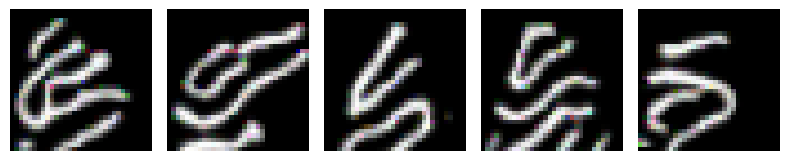

Epoch:   7/ 10, Batch     1, Loss: 0.6817
Epoch:   7/ 10, Batch   101, Loss: 0.6926
Epoch:   7/ 10, Batch   201, Loss: 0.6985
Epoch:   7/ 10, Batch   301, Loss: 0.6993
Epoch:   7/ 10, Batch   401, Loss: 0.6951
Epoch:   7/ 10, Batch   501, Loss: 0.6916
Epoch:   7/ 10, Batch   601, Loss: 0.6954
Epoch:   7/ 10, Batch   701, Loss: 0.6939
Epoch:   7/ 10, Batch   801, Loss: 0.6899
Epoch:   7/ 10, Batch   901, Loss: 0.6911
-----------------------------------------
Epoch:   7 took 172.49s
Epoch:   7, Test Loss: 0.7936
-----------------------------------------


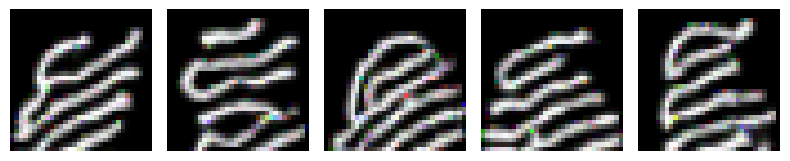

Epoch:   8/ 10, Batch     1, Loss: 0.6920
Epoch:   8/ 10, Batch   101, Loss: 0.6847
Epoch:   8/ 10, Batch   201, Loss: 0.6874
Epoch:   8/ 10, Batch   301, Loss: 0.6857
Epoch:   8/ 10, Batch   401, Loss: 0.6902
Epoch:   8/ 10, Batch   501, Loss: 0.6829
Epoch:   8/ 10, Batch   601, Loss: 0.6839
Epoch:   8/ 10, Batch   701, Loss: 0.6866
Epoch:   8/ 10, Batch   801, Loss: 0.6809
Epoch:   8/ 10, Batch   901, Loss: 0.6840
-----------------------------------------
Epoch:   8 took 169.82s
Epoch:   8, Test Loss: 0.7205
-----------------------------------------


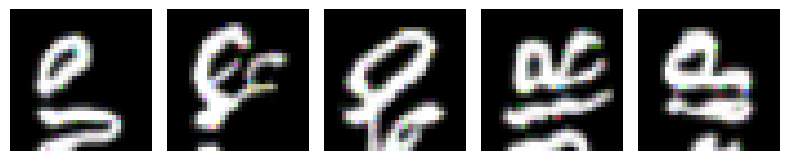

Epoch:   9/ 10, Batch     1, Loss: 0.6668
Epoch:   9/ 10, Batch   101, Loss: 0.6770
Epoch:   9/ 10, Batch   201, Loss: 0.6795
Epoch:   9/ 10, Batch   301, Loss: 0.6812


KeyboardInterrupt: 

In [18]:
# Training
import time
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
from torch.optim import Adam, AdamW, RMSprop, SGD 

PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)
# Select device
# if torch.cuda.is_available():
#   device = torch.device('cuda:0')
# else:
#   device = torch.device('cpu')
device = torch.device('cuda:0')
print(f'Using device: {device}')
print('=========================================')

PixelCNN.to(device)

learning_rates = []
train_loss_curve = []
test_loss_curve = []
train_loss_epochs = []
test_loss_epochs = []
optimizer = None

# Select optimizer
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
else:
  optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


overall_start_time = time.time()

# training loop
for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  PixelCNN.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device)
    output = PixelCNN(images)
    # print(output.shape)
    images = images.view(-1)
    # images = images.permute(0, 2, 3, 1).contiguous().view(-1)
    # print(images.shape)
    output = torch.reshape(output, (batch_size, 256, 3, 32, 32))
    output = output.permute(0,2,3,4,1).contiguous().view(-1, 256)

    # output = nn.functional.softmax(output, dim=1)
    # output = torch.argmax(output, dim=1)

    # print(output)
    images = images*255
    # print(images.long())

    loss = nn.functional.cross_entropy(output, images.long())
    loss.backward()
    torch.nn.utils.clip_grad_norm_(PixelCNN.parameters(), 1)
    # torch.nn.utils.clip_grad_norm_(PixelCNN.parameters(), 1)
    optimizer.step()
    for param_group in optimizer.param_groups:
      learning_rates.append(param_group['lr'])
    optimizer.zero_grad()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      train_loss_curve.append(average_loss)
      train_loss_epochs.append(epoch + 1)
      losses = []
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  # scheduler.step()
  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  test_loss = evaluation.evaluate(model=PixelCNN, test_data_loader=test_data, device=device, batch_size=batch_size)
  test_loss_curve.append(test_loss)
  test_loss_epochs.append(epoch + 1)
  print(f'Epoch: {epoch + 1:3d}, Test Loss: {test_loss:.4f}')
  print('-----------------------------------------')
  

  samples = sampling.sample(PixelCNN, num_samples=5)
  sampling.save_samples(samples, filename="MNIST", mnist=True)
  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')

# Loss Curve Plot
plt.figure(figsize=(10, 5))
plt.plot(train_loss_epochs, train_loss_curve, label='Train Loss')
plt.scatter(test_loss_epochs, test_loss_curve, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Learning Rate Plot
num_batches = len(training_data)
learning_rates_res = [sum(learning_rates[i * num_batches:(i + 1) * num_batches]) / num_batches for i in range(num_epochs)]
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates_res)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Time')
plt.show()

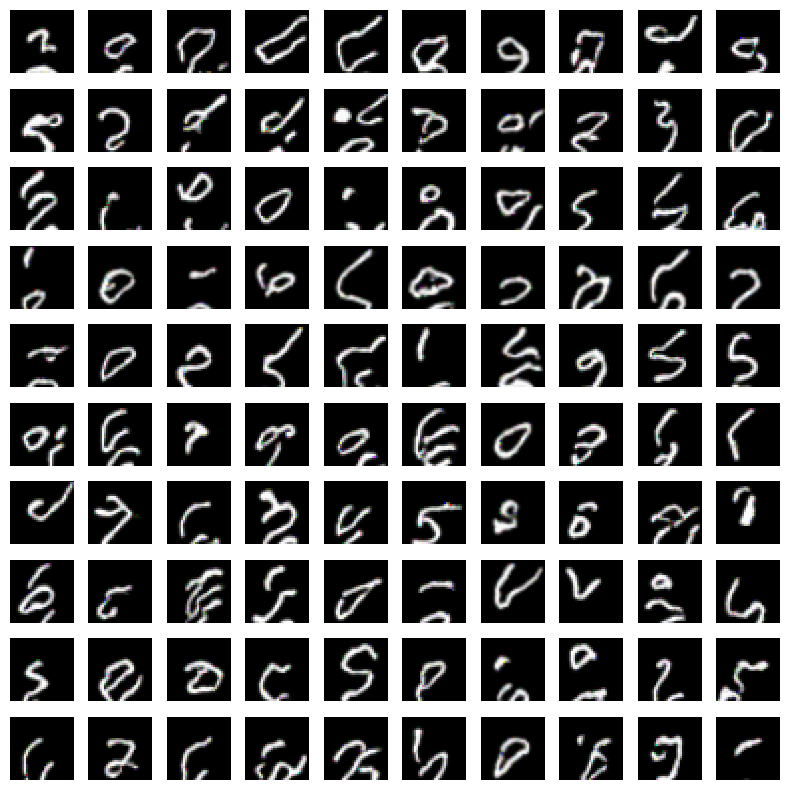

In [ ]:
final_samples= sampling.sample(PixelCNN, num_samples=100)
sampling.save_samples(final_samples, filename = "MNIST", mnist = True)